In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tweet = pd.read_csv("/content/tapera_project.csv")
tweet

,created_at,full_text
0,Thu May 30 23:38:43 +0000 2024,@siregar_elang Sangat setuju Tapera. Sy yakin ...
1,Thu May 30 23:38:43 +0000 2024,Ngitung TAPERA Anggap aja gaji Anda 200jt/bula...
2,Thu May 30 23:38:35 +0000 2024,@CNNIndonesia YA TERUS NGAPAIN HARUS IKUT TAPE...
3,Thu May 30 23:38:28 +0000 2024,Dari kemarin merenungi payslip yang potongan P...
4,Thu May 30 23:38:26 +0000 2024,Realistis aja orang yg gajinya diatas 15jt an ...
...,...,...
4091,Wed May 29 16:48:59 +0000 2024,@PreciosaKanti Mksdnya dia hitung semua anak m...
4092,Wed May 29 16:48:55 +0000 2024,Daripada Tapera dwn DP Rp0 yang jelek2 mending...
4093,Wed May 29 16:48:25 +0000 2024,Kipop fans udah mencicil rumah bahkan sebelum ...
4094,Wed May 29 16:48:21 +0000 2024,@rajaonan @investorgabut Masuk bang TAPERA bua...


In [ ]:
tweet.shape

(4096, 2)

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.1 MB/s eta 0:00:00


In [ ]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = replace_contractions(text)
    return text

def remove_nonascii(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_url(text):
    text = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)
    return text


def remove_digit(text):
    text = re.sub(r"\b\d+\b", " ", text)
    return text

def remove_punctuations(text):
    text = re.sub(r'[^\w]|_',' ',text)
    return text

def remove_byte_str(text):
    text = text.replace("b'",'')
    text = text.replace('b"','')
    return text

def remove_additional_white_spaces(text):
    text = re.sub('[\s]+', ' ', text)
    return text

def remove_retweet_mention(text):
    text = re.sub('RT @[\w_]+: ', '', text)
    return text

def remove_username(text):
    text = re.sub('@[^\s]+','',text)
    return text

def remove_single_letter(text):
    text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
    return text

def do_preprocessing(text):
    text = denoise_text(text)
    text = remove_byte_str(text)
    text = remove_retweet_mention(text)
    text = remove_username(text)
    text = remove_nonascii(text)
    text = remove_url(text)
    text = remove_digit(text)
    text = remove_punctuations(text)
    text = remove_single_letter(text)
    text = remove_additional_white_spaces(text)
    text = text.lower()
    return text

In [ ]:
tweet['text'] = tweet['full_text'].apply(do_preprocessing)
print(tweet['text'])

<ipython-input-5-e982ea921c20>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


0        sangat setuju tapera sy yakin seluruh karyawa...
1       ngitung tapera anggap aja gaji anda 200jt bula...
2                     ya terus ngapain harus ikut tapera 
3       dari kemarin merenungi payslip yang potongan p...
4       realistis aja orang yg gajinya diatas 15jt an ...
                              ...                        
4091     mksdnya dia hitung semua anak mantunya bebas ...
4092    daripada tapera dwn dp rp0 yang jelek2 mending...
4093    kipop fans udah mencicil rumah bahkan sebelum ...
4094     masuk bang tapera buat ladang baru untuk di k...
4095       oke gas demo buruan gak setuju nih sama tapera
Name: text, Length: 4096, dtype: object


In [ ]:
# train val split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(tweet, test_size=0.3, random_state=42)

In [ ]:
train_data.to_csv('train_data.csv', sep=',', index=False)
test_data.to_csv('test_data.csv', sep=',', index=False)

In [ ]:
tweet.to_csv('tapera_pro.csv', sep=',', index=False)

# Word Cloud

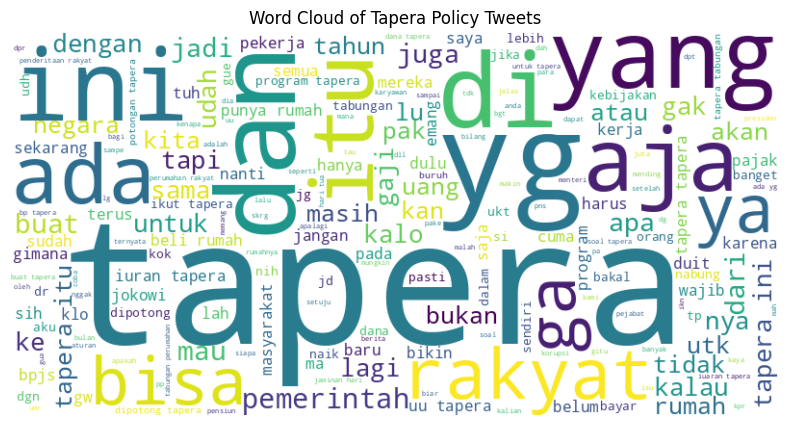

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text data into a single string
text_data = ' '.join(tweet['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tapera Policy Tweets')
plt.show()

In [ ]:
text_data

' sangat setuju tapera sy yakin seluruh karyawan menerima asalkan pemerintah tetapkan kenaikan gaji karyawan  ngitung tapera anggap aja gaji anda 200jt bulan 200jt 60jt bulan 60jt 720jt tahun jadi kalau punya tapera selama 10tahun 720jt rp7 milyar alhamdulillah nabung 10th punya rumah mevvah begitu kan ngitungnya bang tapera  ya terus ngapain harus ikut tapera  dari kemarin merenungi payslip yang potongan pph bpjs bpjs tknya kalau ditotal bisa bayar listrik wifi dan kebutuhan makan dua minggu terus ngebayangin akan dipotong lagi buat tapera mesti kerja keras banting tulang mana lagi p pemerintah kok nyebelin sih realistis aja orang yg gajinya diatas 15jt an pasti sebagian besar duitnya ditabung dan udah bisa beli rumah sebelum si tapera taperi ini cair  harusnya presiden menolak tapera gitu aja kok repot pake nyalahin yg lain   gan yang dicicil itu wujudnya sdh ada analogi sederhana nya gini kalo belom ada rumah nya tapi dikondisikan untuk menabung itu aneh bukan nabung namanya tapi in

# **Labeling**

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
tapera = pd.read_csv('/content/tapera_pro.csv')

In [ ]:
tapera

,created_at,text
0,Thu May 30 23:38:43 +0000 2024,sangat setuju tapera sy yakin seluruh karyawa...
1,Thu May 30 23:38:43 +0000 2024,ngitung tapera anggap aja gaji anda 200jt bula...
2,Thu May 30 23:38:35 +0000 2024,ya terus ngapain harus ikut tapera
3,Thu May 30 23:38:28 +0000 2024,dari kemarin merenungi payslip yang potongan p...
4,Thu May 30 23:38:26 +0000 2024,realistis aja orang yg gajinya diatas 15jt an ...
...,...,...
4089,Wed May 29 16:48:59 +0000 2024,mksdnya dia hitung semua anak mantunya bebas ...
4090,Wed May 29 16:48:55 +0000 2024,daripada tapera dwn dp rp0 yang jelek2 mending...
4091,Wed May 29 16:48:25 +0000 2024,kipop fans udah mencicil rumah bahkan sebelum ...
4092,Wed May 29 16:48:21 +0000 2024,masuk bang tapera buat ladang baru untuk di k...


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

pretrained_model = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)

sentiment_analysis = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
def label_teks(teks):
  results = sentiment_analysis(teks)
  label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}
  labels = []
  for result in results:
    labels.append(label_index[result['label']])
  return labels

In [ ]:
tapera['label'] = None
tapera

,created_at,text,label
0,Thu May 30 23:38:43 +0000 2024,sangat setuju tapera sy yakin seluruh karyawa...,None
1,Thu May 30 23:38:43 +0000 2024,ngitung tapera anggap aja gaji anda 200jt bula...,None
2,Thu May 30 23:38:35 +0000 2024,ya terus ngapain harus ikut tapera,None
3,Thu May 30 23:38:28 +0000 2024,dari kemarin merenungi payslip yang potongan p...,None
4,Thu May 30 23:38:26 +0000 2024,realistis aja orang yg gajinya diatas 15jt an ...,None
...,...,...,...
4089,Wed May 29 16:48:59 +0000 2024,mksdnya dia hitung semua anak mantunya bebas ...,None
4090,Wed May 29 16:48:55 +0000 2024,daripada tapera dwn dp rp0 yang jelek2 mending...,None
4091,Wed May 29 16:48:25 +0000 2024,kipop fans udah mencicil rumah bahkan sebelum ...,None
4092,Wed May 29 16:48:21 +0000 2024,masuk bang tapera buat ladang baru untuk di k...,None


In [ ]:
tapera['label'] = tapera['text'].apply(label_teks)

In [ ]:
tapera

,created_at,text,label
0,Thu May 30 23:38:43 +0000 2024,sangat setuju tapera sy yakin seluruh karyawa...,[neutral]
1,Thu May 30 23:38:43 +0000 2024,ngitung tapera anggap aja gaji anda 200jt bula...,[positive]
2,Thu May 30 23:38:35 +0000 2024,ya terus ngapain harus ikut tapera,[negative]
3,Thu May 30 23:38:28 +0000 2024,dari kemarin merenungi payslip yang potongan p...,[negative]
4,Thu May 30 23:38:26 +0000 2024,realistis aja orang yg gajinya diatas 15jt an ...,[negative]
...,...,...,...
4089,Wed May 29 16:48:59 +0000 2024,mksdnya dia hitung semua anak mantunya bebas ...,[neutral]
4090,Wed May 29 16:48:55 +0000 2024,daripada tapera dwn dp rp0 yang jelek2 mending...,[negative]
4091,Wed May 29 16:48:25 +0000 2024,kipop fans udah mencicil rumah bahkan sebelum ...,[neutral]
4092,Wed May 29 16:48:21 +0000 2024,masuk bang tapera buat ladang baru untuk di k...,[negative]


In [ ]:
tapera['label'] = tapera['label'].astype(str)
tapera['label'] = tapera['label'].astype(str).replace('[','').str.replace(']','')
tapera['label'] = tapera['label'].str.replace("'",'')

In [ ]:
tapera['label'] = tapera['label'].astype(str)
tapera['label'] = tapera['label'].str.replace(r"[\[\]']", '', regex=True)

In [ ]:
tapera

,created_at,text,label
0,Thu May 30 23:38:43 +0000 2024,sangat setuju tapera sy yakin seluruh karyawa...,neutral
1,Thu May 30 23:38:43 +0000 2024,ngitung tapera anggap aja gaji anda 200jt bula...,positive
2,Thu May 30 23:38:35 +0000 2024,ya terus ngapain harus ikut tapera,negative
3,Thu May 30 23:38:28 +0000 2024,dari kemarin merenungi payslip yang potongan p...,negative
4,Thu May 30 23:38:26 +0000 2024,realistis aja orang yg gajinya diatas 15jt an ...,negative
...,...,...,...
4089,Wed May 29 16:48:59 +0000 2024,mksdnya dia hitung semua anak mantunya bebas ...,neutral
4090,Wed May 29 16:48:55 +0000 2024,daripada tapera dwn dp rp0 yang jelek2 mending...,negative
4091,Wed May 29 16:48:25 +0000 2024,kipop fans udah mencicil rumah bahkan sebelum ...,neutral
4092,Wed May 29 16:48:21 +0000 2024,masuk bang tapera buat ladang baru untuk di k...,negative


In [ ]:
tapera['label'].value_counts()

label
negative    2236
neutral     1539
positive     319
Name: count, dtype: int64

In [ ]:
tapera.to_csv("tapera__pro_label.csv", sep = ",", index=False)

# Count Sentiment

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/tapera_label.csv')

In [ ]:
data['label'].value_counts()

label
negative    2239
neutral     1538
positive    1087
Name: count, dtype: int64

<ipython-input-4-7103713fe5d2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')  # Use a modern style for the plot


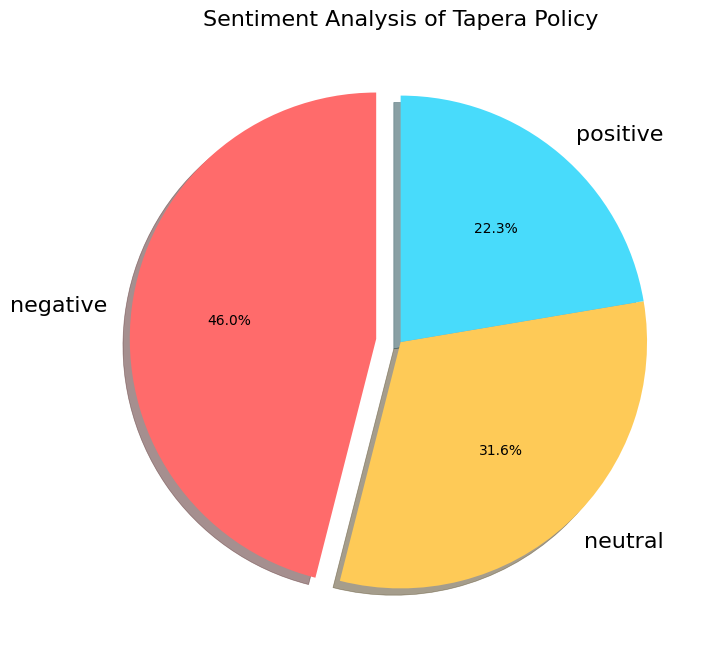

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each label
label_counts = data['label'].value_counts() * 100

# Colors
colors = ['#ff6b6b', '#feca57', '#48dbfb', '#1dd1a1', '#5f27cd']

# Plotting the pie chart
plt.style.use('seaborn-poster')  # Use a modern style for the plot
plt.figure(figsize=(10, 8))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        explode=[0.1 if i == label_counts.idxmax() else 0 for i in label_counts.index])

plt.title('Sentiment Analysis of Tapera Policy', fontsize=16)
plt.show()


# Encode Label

In [ ]:
labell={"positive": 0, "neutral": 1, "negative": 2}
data.replace({'label':labell},inplace=True)

data

,text,label
0,sangat setuju tapera sy yakin seluruh karyawa...,1
1,ngitung tapera anggap aja gaji anda 200jt bula...,0
2,ya terus ngapain harus ikut tapera,2
3,dari kemarin merenungi payslip yang potongan p...,2
4,realistis aja orang yg gajinya diatas 15jt an ...,2
...,...,...
4859,ngga pake ribut2 pengalihannya pain ukt dan t...,0
4860,ngga pake ribut2 pengalihannya di ukt asuhan ...,0
4861,ngga pake ribut2 etnik di ukt dan tapera cake...,0
4862,pengen banget ngurus uang kami banyak yg sugi...,0


In [ ]:
data = data.drop(['created_at'], axis = 1)
data

,text,label
0,sangat setuju tapera sy yakin seluruh karyawa...,1
1,ngitung tapera anggap aja gaji anda 200jt bula...,0
2,ya terus ngapain harus ikut tapera,2
3,dari kemarin merenungi payslip yang potongan p...,2
4,realistis aja orang yg gajinya diatas 15jt an ...,2
...,...,...
4089,mksdnya dia hitung semua anak mantunya bebas ...,1
4090,daripada tapera dwn dp rp0 yang jelek2 mending...,2
4091,kipop fans udah mencicil rumah bahkan sebelum ...,1
4092,masuk bang tapera buat ladang baru untuk di k...,2


In [ ]:
# train val test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, stratify=data.label, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.2, stratify=test_data.label, random_state=42)

In [ ]:
print(train_data['label'].value_counts())
print(test_data['label'].value_counts())
print(val_data['label'].value_counts())

label
2    1567
1    1076
0     761
Name: count, dtype: int64
label
2    538
1    369
0    261
Name: count, dtype: int64
label
2    134
1     93
0     65
Name: count, dtype: int64


In [ ]:
train_data.to_csv('train_tapera.csv', sep=',', header=True, index=False)
val_data.to_csv('val_tapera.csv', sep=',', header=True, index=False)
test_data.to_csv('test_tapera.csv', sep=',', header=True, index=False)

In [ ]:
tapera.to_csv("tapera__pro_label.csv", sep = ",", index=False)